### Installing Hadoop Single node cluster on Windows 10

In [ ]:
# Prerequisites
 1. Java 8 runtime environment (JRE)
        https://www.java.com/en/download/windows_offline.jsp
            
 2. Java 8 development Kit (JDK)
        https://www.oracle.com/java/technologies/downloads/#java8
        
 3. Downloaded Hadoop binaries 
        https://www.apache.org/dyn/closer.cgi/hadoop/common/hadoop-3.2.2/hadoop-3.2.2.tar.gz

In [ ]:
# Hadoop Installation and Configuration
1.

### 01 Install Prerequisites

In [ ]:
# 01 Install Java 8 runtime environment (JRE)

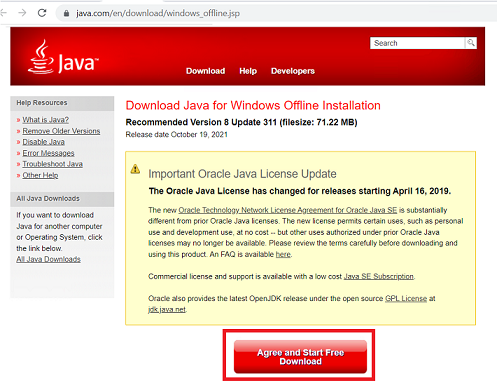

In [ ]:
# 02 Java 8 development Kit (JDK)

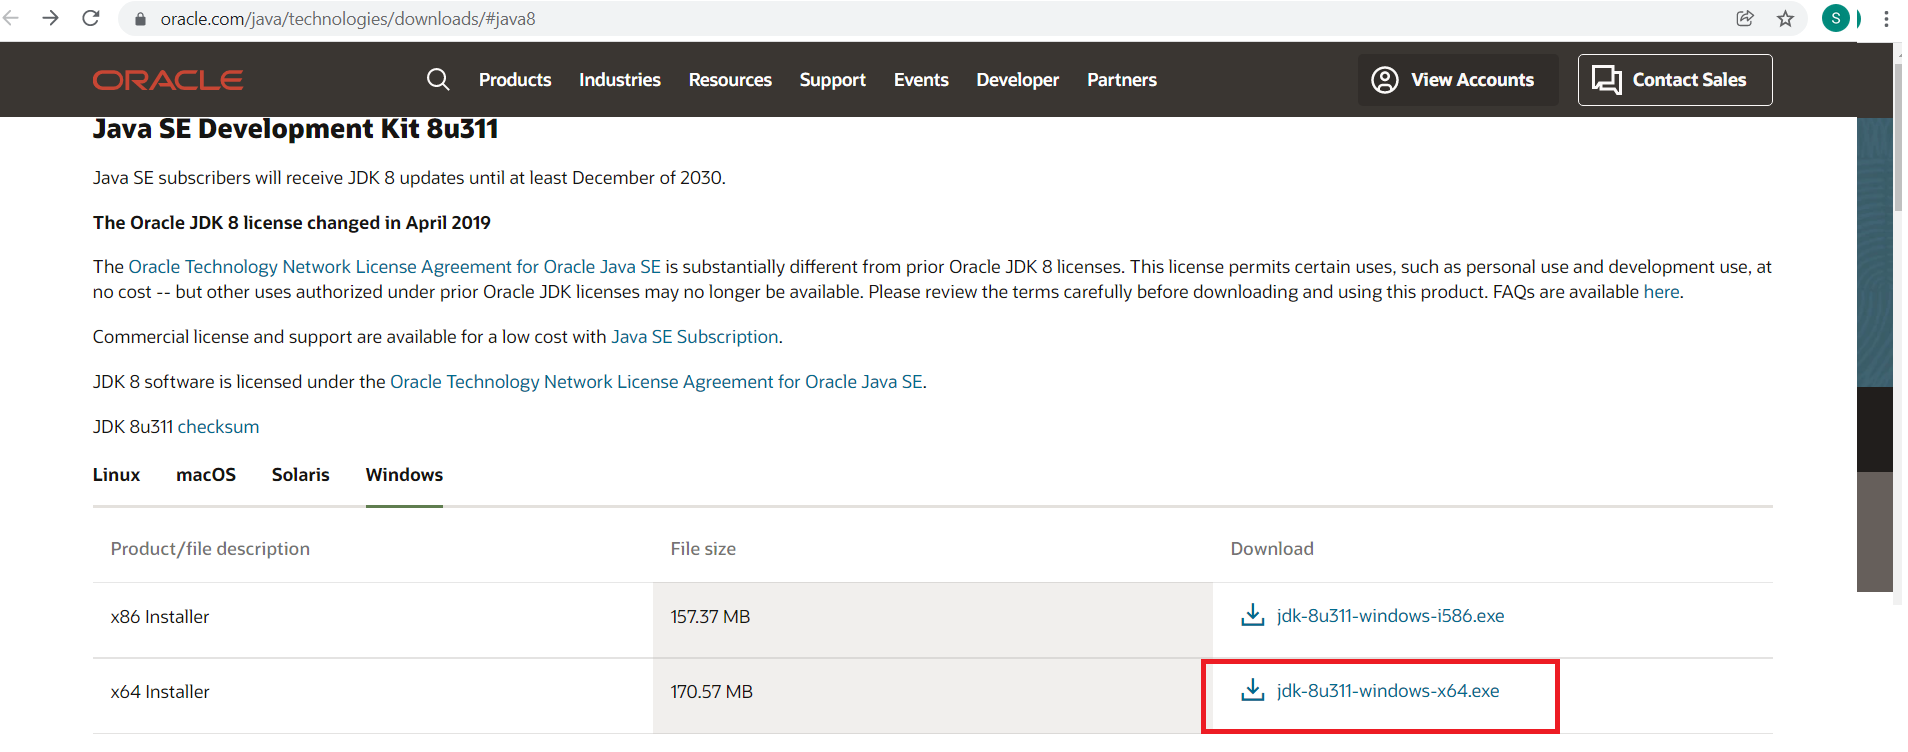

In [ ]:
#03 Downloaded Hadoop binaries and unzip

# Note: Install '7Zip' to Extract Hadoop Binaries
        https://www.7-zip.org/download.html

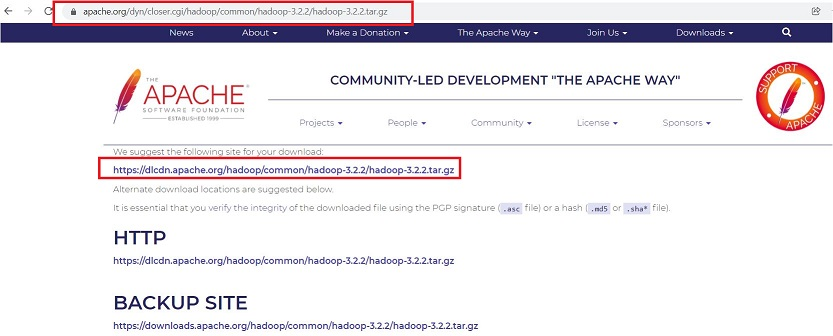

In [ ]:
### 02 Install JRE 

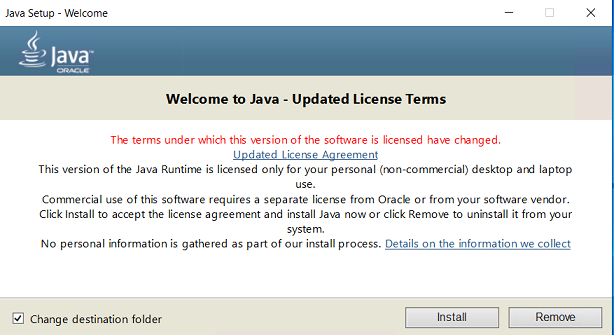

In [ ]:
### 03 Install Java SDK

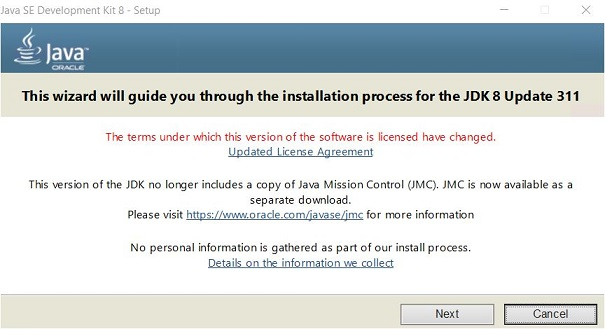

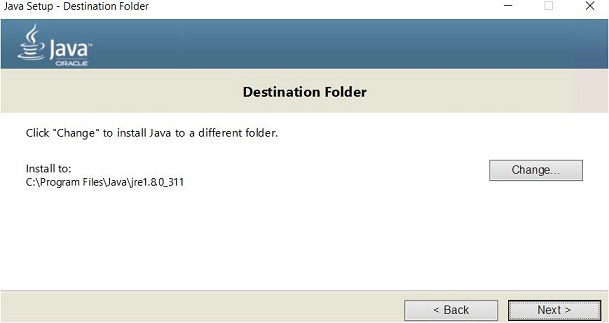

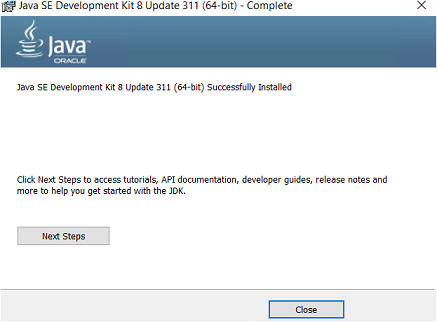

In [ ]:
## 04 Setting up environment variables
#    (Right-click > properties on My Computer icon) and click on the "Advanced system settings" link.

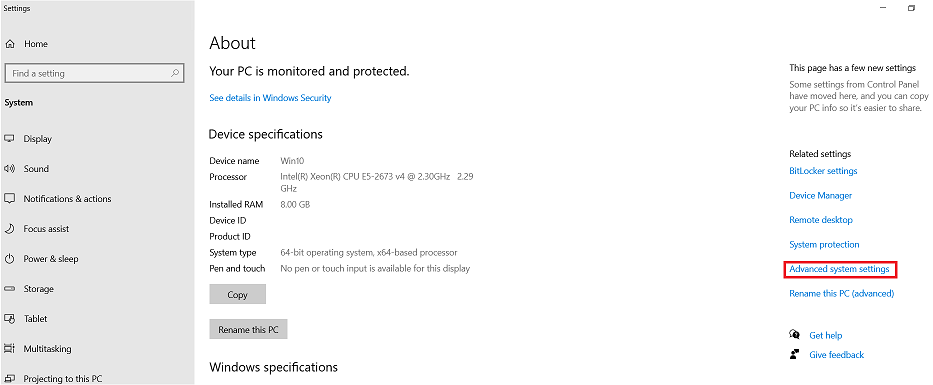

In [ ]:
# Click on 'Advanced System Settings'
# Click on 'Advanced -> Environment Varibales' in 'System Properties' window

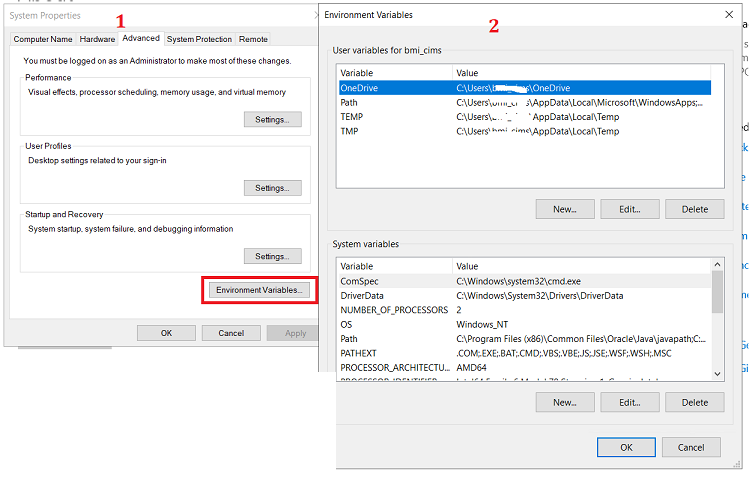

In [ ]:
### In the 'Environment Variables' dialog, press the 'New' button to add a new variable.

### There are two variables to define:
### 1. JAVA_HOME: JDK installation folder path
### 2. HADOOP_HOME: Hadoop installation folder path

In [ ]:
### JAVA_HOME

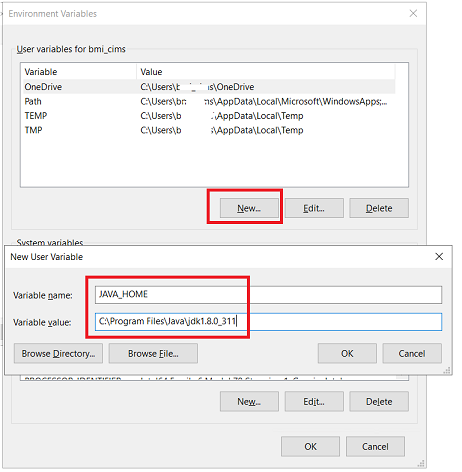

In [ ]:
## HADOOP_HOME

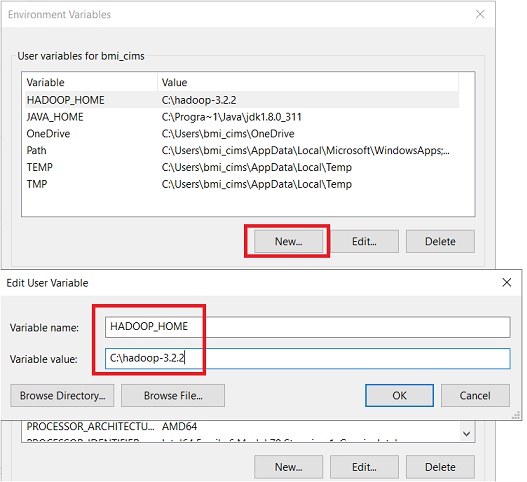

In [ ]:
### Edit the 'PATH' variable to add the 'JAVA_HOME and 'HADOOP_HOME' binaries paths.

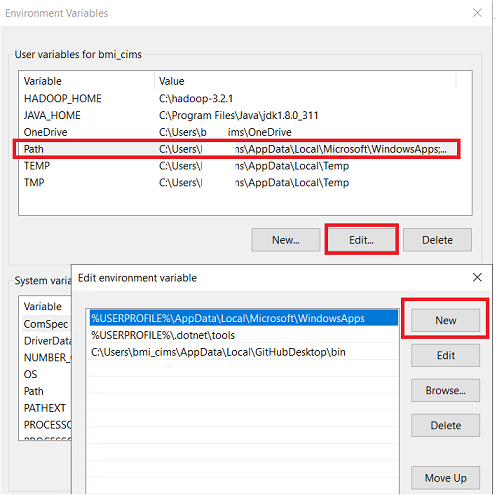

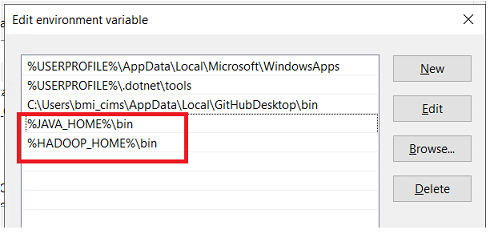

In [ ]:
'''

04 Extract the Hadoop Files to C:Drive

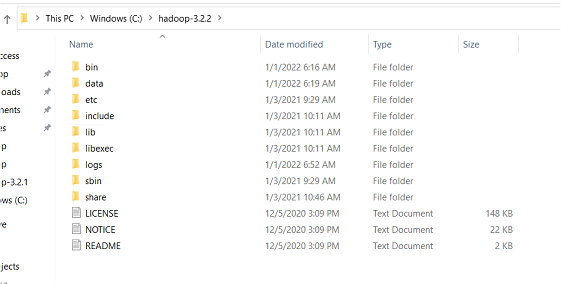

In [ ]:
'''

05 Add the Hadoop native IO libraries, which can be found in the following GitHub repository
   https://github.com/cdarlint/winutils
   
   Since we are installing Hadoop 3.2.2, we should download the files located in hadoop-3.2.2/bin/
   copy them into the 'C:\hadoop-3.2.2\bin' directory

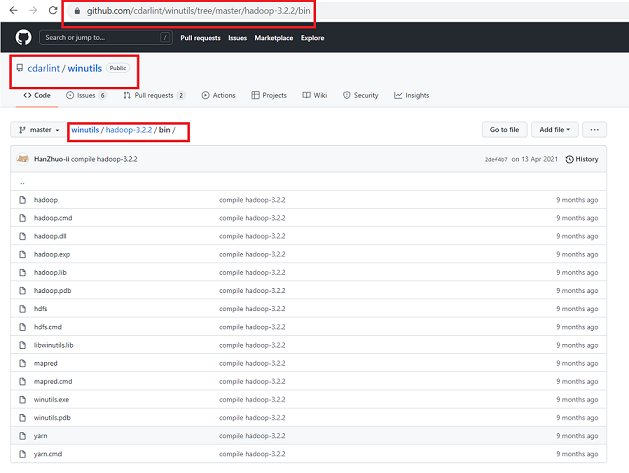

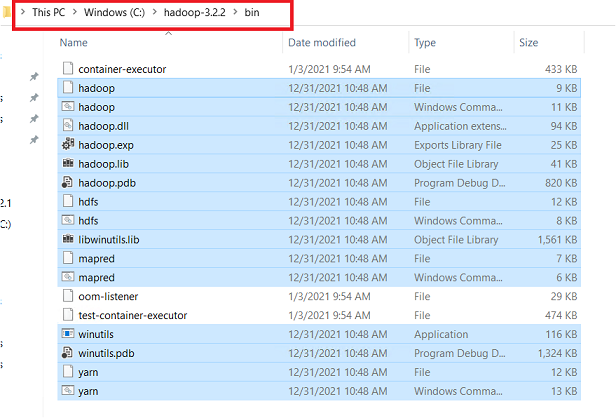

In [ ]:
'''
Check for the Installation
    1. Open the Power Shell and run command 'hadoop -version'
    2. If we get below the error 'JAVA_HOME is incorrectly set' means
       we should use the windows 8.3 path instead.
       
       Changes on the  'Environment Varibales'
           Use “Progra~1” instead of “Program Files”
           Use “Progra~2” instead of “Program Files(x86)”

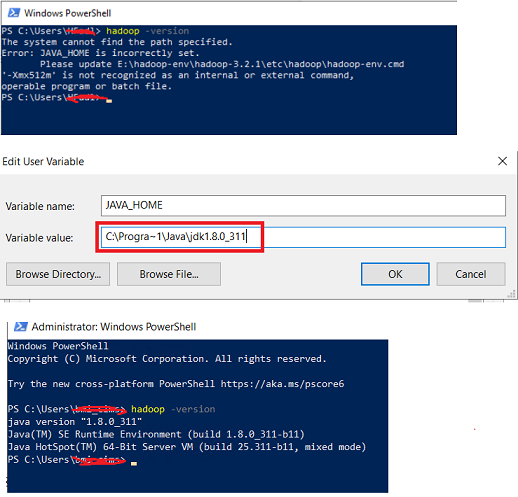

In [ ]:
'''
06 Configuring Hadoop cluster

There are four files we should alter to configure Hadoop cluster:
%HADOOP_HOME%\etc\hadoop\hdfs-site.xml
%HADOOP_HOME%\etc\hadoop\core-site.xml
%HADOOP_HOME%\etc\hadoop\mapred-site.xml
%HADOOP_HOME%\etc\hadoop\yarn-site.xml

In [ ]:
'''

06.1 HDFS site configuration
    - Create a directory to store all master node (name node) data and another one to store data (data node).
    - Create the following directories:
        - C:\hadoop-3.2.2\data\dfs\namenode
        - C:\hadoop-3.2.2\data\dfs\datanode

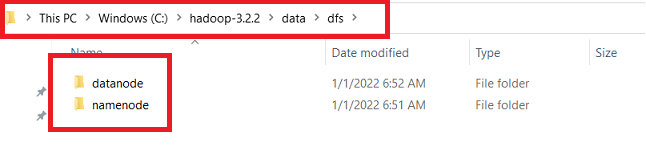

In [ ]:
'''
-  Open "hdfs-site.xml" from location 'C:\hadoop-3.2.2\etc\hadoop'
   Add the following properties within the <configuration></configuration> element

  <property>
    <name>dfs.replication</name>
    <value>1</value>
  </property>
  <property>
    <name>dfs.namenode.name.dir</name>
    <value>file:///C:/hadoop-3.2.2/data/dfs/namenode</value>
  </property>
  <property>
    <name>dfs.datanode.data.dir</name>
    <value>file:///C:/hadoop-3.2.2/data/dfs/datanode</value>
  </property>

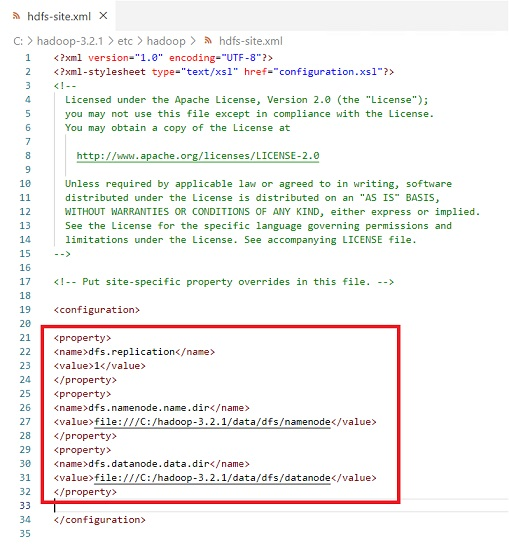

In [ ]:
'''
*** Note that we have set the replication factor to 1 since we are creating a single node cluster.

In [ ]:
'''
06.2 Core site configuration
    - Configure the name node URL
      
    - Open 'core-site.xml' add following XML code into the <configuration> </configuration> element
    
      <property>
         <name>fs.default.name</name>
         <value>hdfs://localhost:9820</value>
      </property>


In [ ]:
'''
06.3 Map Reduce site configuration
    - Open 'mapred-site.xml'
    - Add the following XML code into the <configuration> </configuration> element
    
   <property>
    <name>mapreduce.framework.name</name>
      <value>yarn</value>
      <description>MapReduce framework name</description>
   </property>

In [ ]:
'''
06.4 Yarn site configuration
    - Open 'yarn-site.xml'
    - Add the following XML code into the <configuration> </configuration> element
    
  <property>
    <name>yarn.nodemanager.aux-services</name>
    <value>mapreduce_shuffle</value>
    <description>Yarn Node Manager Aux Service</description>
  </property>

In [ ]:
'''

07 Formatting Name node
    - Open the powershell run the command 'hdfs namenode -format'

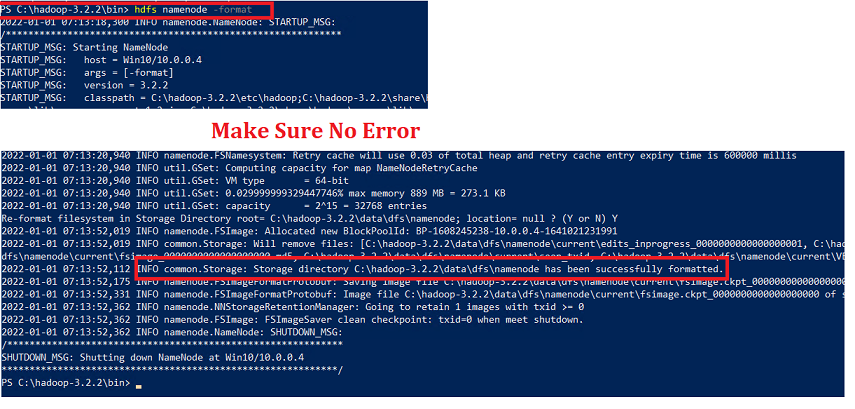

In [ ]:
'''
08  Starting Hadoop services
    - Open the Powershell and Navigate to 'C:\hadoop-3.2.2\sbin'
    - Run the command '.\start-dfs.cmd'
    
    - Two command prompt windows will open (one for the name node and one for the data node)

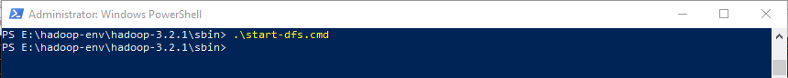

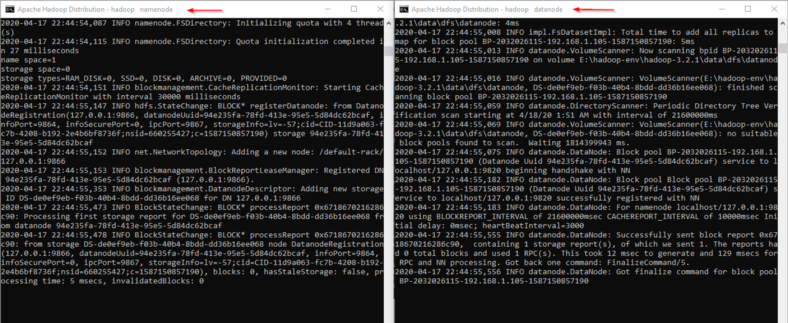

In [ ]:
'''
09 Start the Hadoop Yarn service
    - Open the Powershell and Navigate to 'C:\hadoop-3.2.2\sbin'
    - Run the command './start-yarn.cmd'
    
    - Two command prompt windows will open (one for the resource manager and one for the node manager)

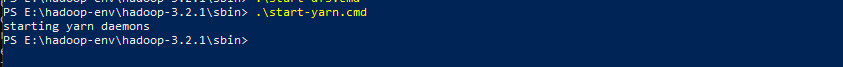

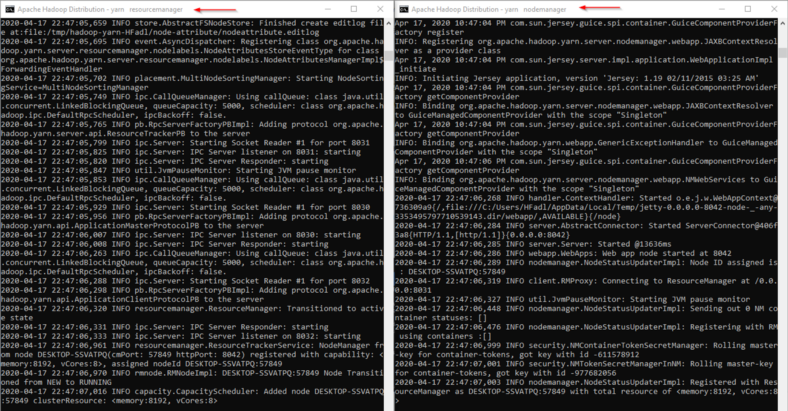

In [ ]:
'''
10 Make sure that all services started successfully
    - Open the Powershell and Navigate to 'C:\hadoop-3.2.2\sbin'
    - Run the comand 'jps'
    
    - It should display the following services:
        14560 DataNode
        4960 ResourceManager
        5936 NameNode
        768 NodeManager
        14636 Jps

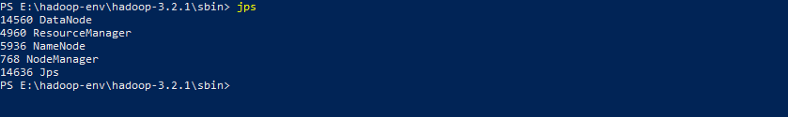

In [ ]:
'''
11 Check the Hadoop Web UI

    There are three web user interfaces to be used:
        1. Name node web page
            http://localhost:9870/dfshealth.html
            
        2. Data node web page
            http://localhost:9864/datanode.html
            
        3. Yarn web page
            http://localhost:8088/cluster


In [ ]:
# Name node web page

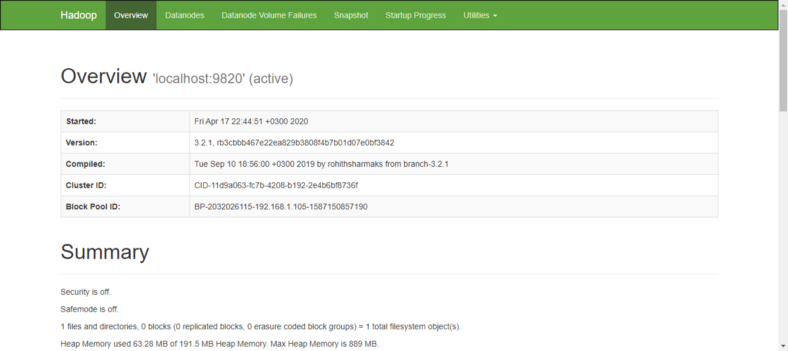

In [ ]:
#  Data node web pag

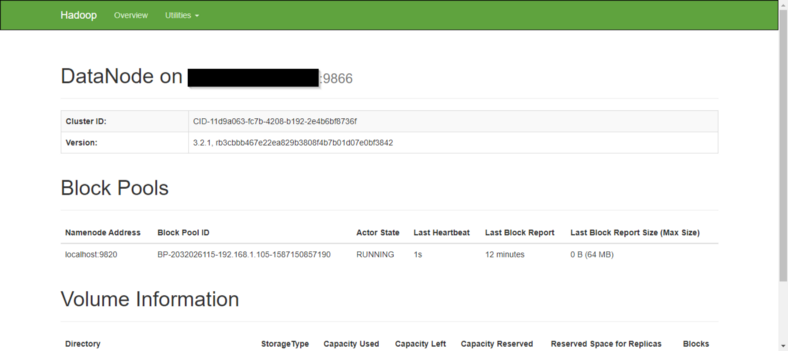

In [ ]:
# Yarn web page

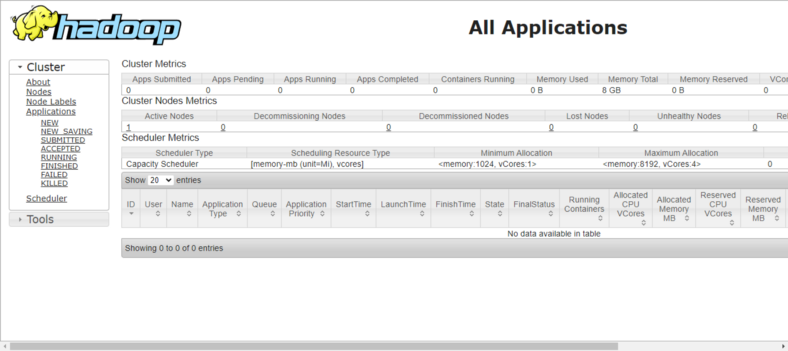

In [ ]:
'''

Accessing and Managing HDFS Data

    HDFS Command-Line Interface
        - The HDFS command-line interface (CLI), called FS Shell, enables you to write shell commands to manage your files in 
          the HDFS cluster.
        - It is useful when you need a scripting language to interact with the stored files and data.
        - Some commonly used parameters with the hadoop fs command follow:
            - mkdir—Creates a directory based on the passed URI.
            - put—Copies one or more files from the local file system (also reads input from stdin) to the destination file 
              system.
            - copyFromLocal—Copies one or more files from the local file system to the destination file system. The -f option 
              overwrites the destination if it already exists.
            - get—Copies one or more files to the local file system.
            - copyToLocal—Copies one or more files to the local file system.
            - ls—Return statistics on the file or content of a directory.
            - lsr—Same as ls but recursive in nature.
            - rm—Deletes a file or directory. The directory must be empty to drop it.
            - rmr—Same as rm but recursive in nature.
            
            
   HDFS Command-Line Interface (hadoop fs)
         1:  @rem --- creating a directory
         2:  hadoop fs -mkdir /example/sampledata
         3:  @rem --- copying a directory
         4:  hadoop fs -copyFromLocal c:\apps\dist\examples\data\gutenberg /example/
             sampledata
         5:  @rem --- listing content of the directory
         6:  hadoop fs -ls /example/sampledata
         7:  hadoop fs -ls /example/sampledata/gutenberg
         8:  @rem --- copying a file
         9:  hadoop fs -copyFromLocal c:\apps\dist\examples\data\sample\sample.log
             /example/sampledata
        10:  @rem --- listing content of the directory
        11:  hadoop fs -ls /example/sampledata
        12:  @rem --- copying a file to local drive
        13:  hadoop fs -copyToLocal /example/sampledata/gutenberg c:\gutenberg
        
*** Note : In Hadoop 2.0, instead of using hadoop fs with the FS Shell, you use hdfs dfs

### Install Spark

In [ ]:
# Prerequisites
 1. Java 8 runtime environment (JRE)
        https://www.java.com/en/download/windows_offline.jsp
            
 2. Java 8 development Kit (JDK)
        https://www.oracle.com/java/technologies/downloads/#java8
        
 3. Install and Configure hadoop
        https://www.apache.org/dyn/closer.cgi/hadoop/common/hadoop-3.2.2/hadoop-3.2.2.tar.gz
        
 4. Set Environment Variables 'JAVA_HOME' 'HADOOP_HOME' 

In [ ]:
'''
01  Download Apache Spark
    https://spark.apache.org/downloads.html
    
    Under the Download Apache Spark heading, there are two drop-down menus. Use the current non-preview version.

    In our case, in Choose a Spark release drop-down menu select 2.4.5
    
    In the second drop-down Choose a package type, leave the selection Pre-built for Apache Hadoop 2.7.
    
    Click the spark-2.4.5-bin-hadoop2.7.tgz link.

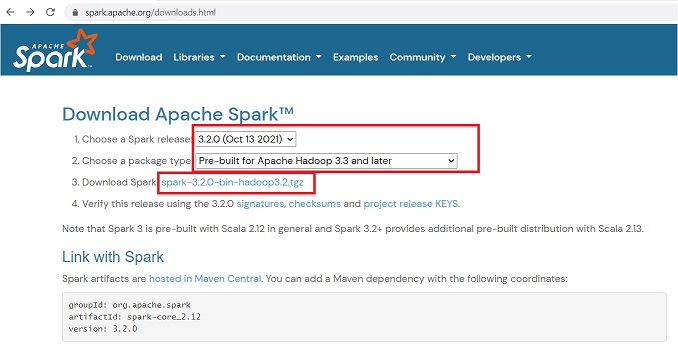

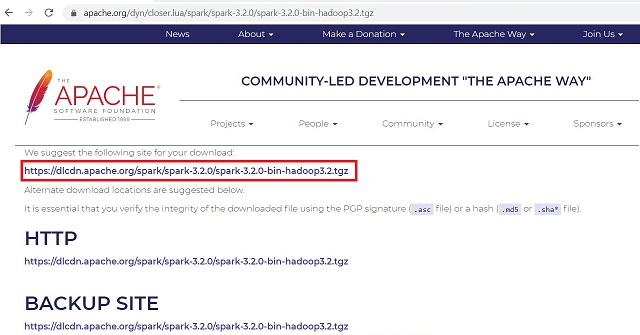

In [ ]:
'''
02 Create Folder path 'C:\Spark' and Extrcat the downloaded Sprk file from 'Download' folder to 'C:\Spark'

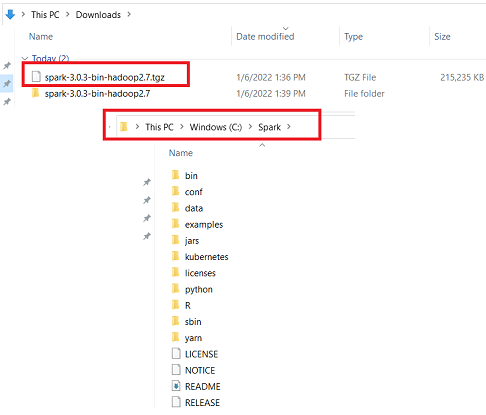

In [ ]:
'''
03 Set in the 'Environment Variable'

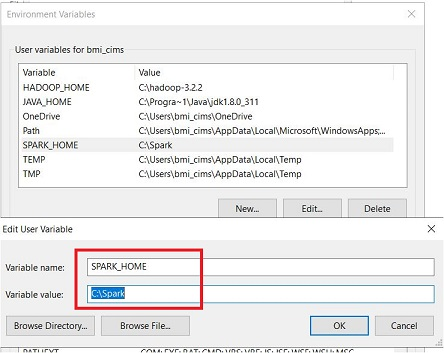

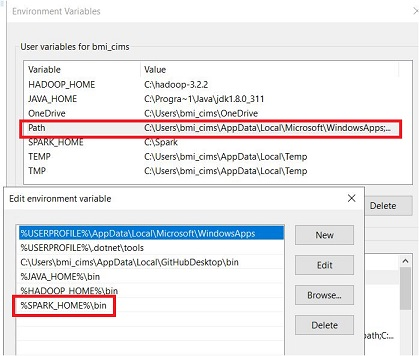

In [ ]:
'''
04  Launch Spark
    
    Open a new command-prompt window using the right-click and Run as administrator
    
    Run below the command 'spark-shell' from C:\Spark\bin

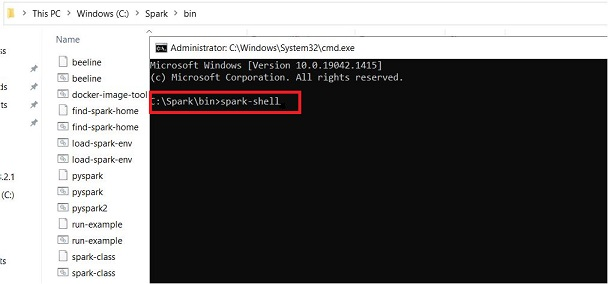

In [ ]:
'''
Finally, the Spark logo appears, and the prompt displays the Scala shell.

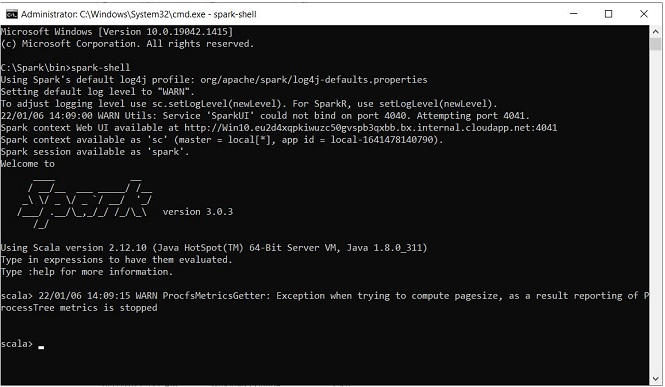

In [ ]:
'''

Open a web browser and navigate to http://localhost:4040/.

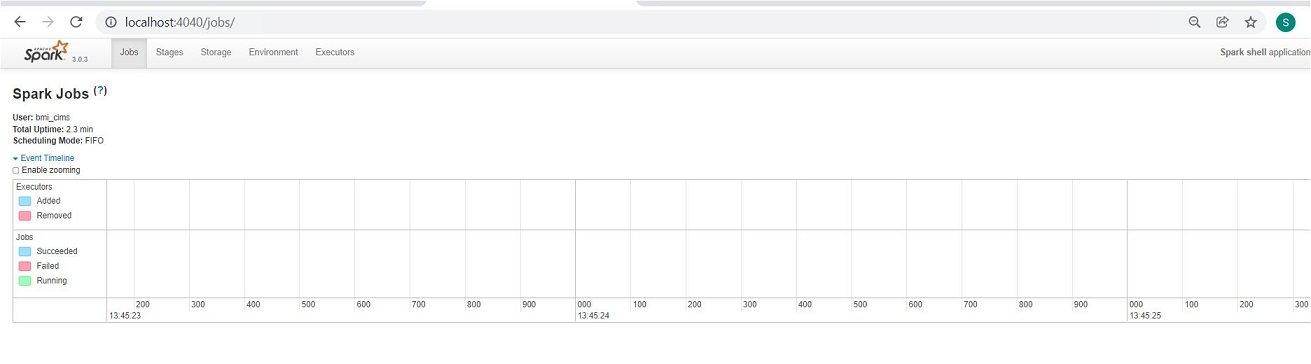

In [ ]:
''''

To exit Spark and close the Scala shell, press ctrl-d in the command-prompt window.

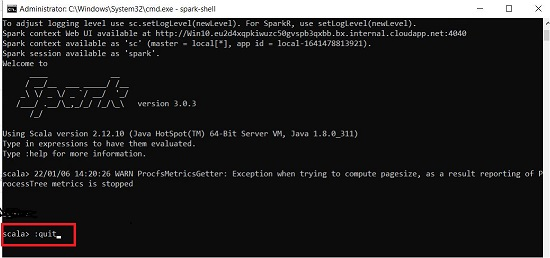

In [ ]:
'''
Start Spark in 'Pyspark' as Shell

The PySpark shell is responsible for linking the python API to the spark core and initializing the spark context.
    

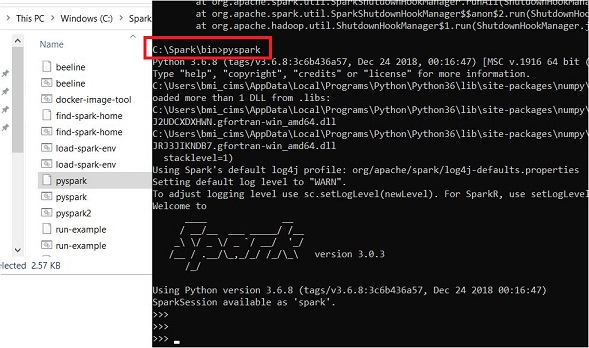

### Start Master and Slave

In [ ]:
'''
01. Setup and Run Spark Master and Save on the Machine (Standalone)

    1.1 Run Master
        - Open the command Prompt from the path 'C:\Spark\bin' 
        - Run Below the command
            - C:\Spark\bin>spark-class2.cmd org.apache.spark.deploy.master.Master 
                           or
            - C:\Spark\bin>spark-class org.apache.spark.deploy.master.Master
                
        - Access master’s web UI on the Url http://localhost:8080/

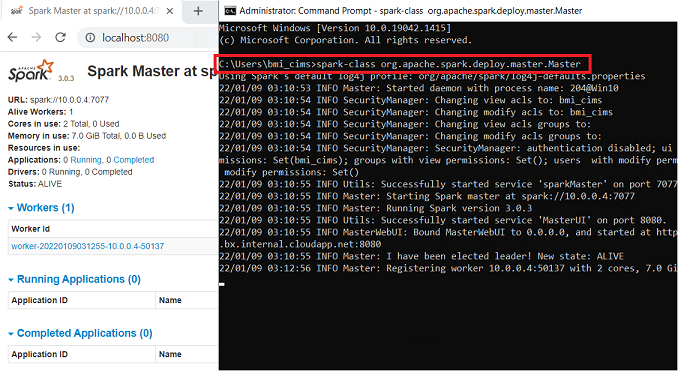

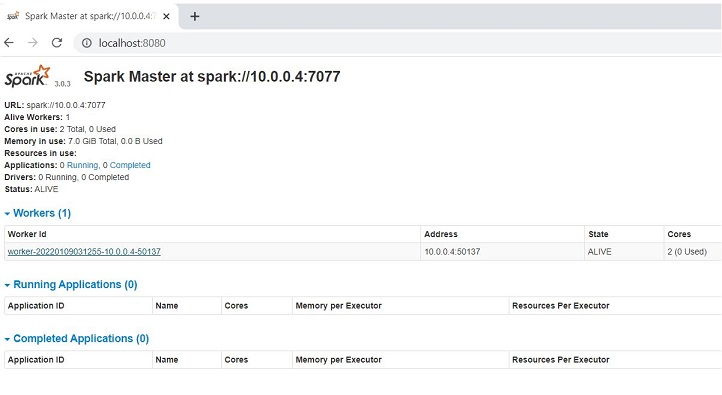

In [ ]:
'''
    1.2 Run Slave
        - Open the command Prompt from the path 'C:\Spark\bin' 
        - Run Below the command
            - C:\Spark\bin>spark-class2.cmd org.apache.spark.deploy.worker.Worker -c 1 -m 4G spark://10.0.0.4:7077
            
        - Access Slave's web UI on the Url http://localhost:8081/

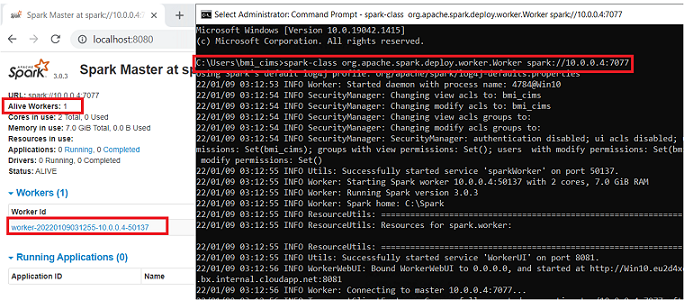

In [ ]:
# Note : Make Sure Master and Slave Command Prompt are running 

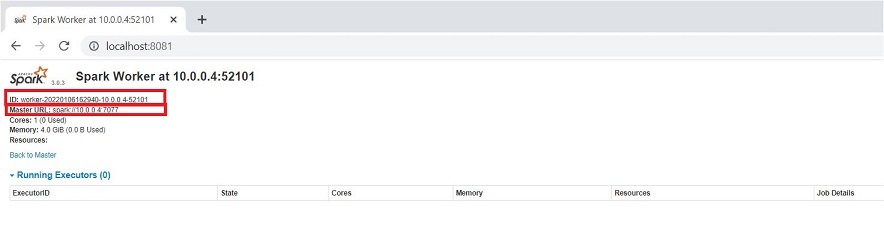

### Web GUI

In [ ]:
'''
Apache Spark provides suite Web UI for monitor the status of your Spark/PySpark application, resource consumption of 
Spark cluster, and Spark configurations.

Apache Spark Web UI
    - Jobs
    - Stages
    - Tasks
    - Storage
    - Environment
    - Executors
    - SQL
    
    
Open a web browser and navigate to http://localhost:4040/
    ** Note : Master and Slave should be  started

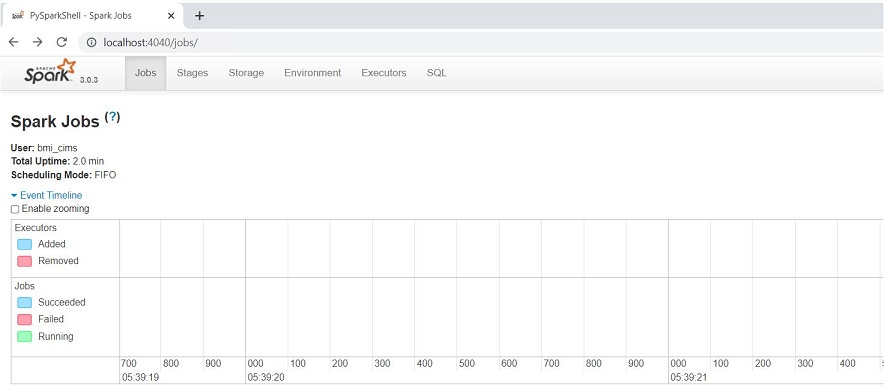

In [ ]:
'''
Create A python program as below and save it as spark_basic.py on the desktop

spark_basic.py

    import findspark
    findspark.init('C:\Spark')

    from pyspark import SparkConf
    from pyspark import SparkContext

    conf = SparkConf()
    conf.setMaster('spark://10.0.0.4:7077')   # Mention the Master Node
    conf.setAppName('spark-basic')
    sc = SparkContext(conf=conf)

    def mod(x):
        import numpy as np
        return (x, np.mod(x, 2))

    rdd = sc.parallelize(range(1000)).map(mod).take(10)
    print(rdd)


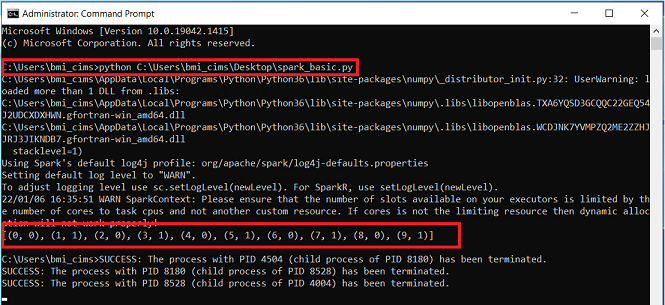

In [ ]:
# Refresh the master  WebGUI 

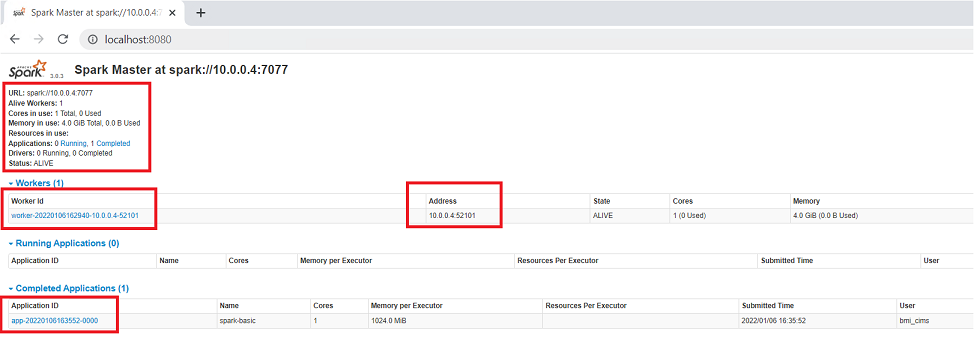

In [ ]:
# Refresh the Slave  WebGUI 

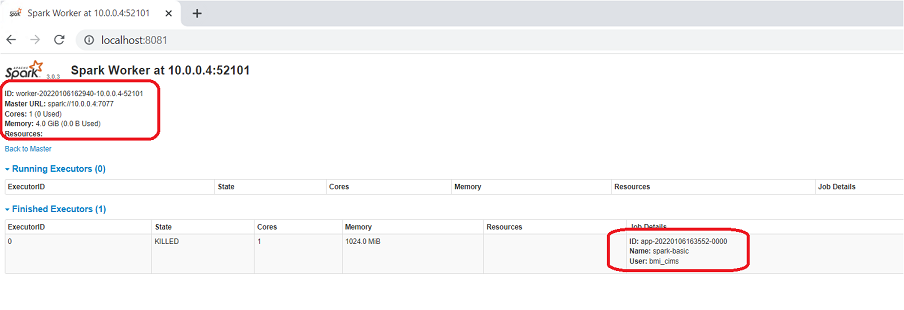

In [ ]:
# Note Make Sure While Running Spark Application (Code from python File) Master and Slave are runnning

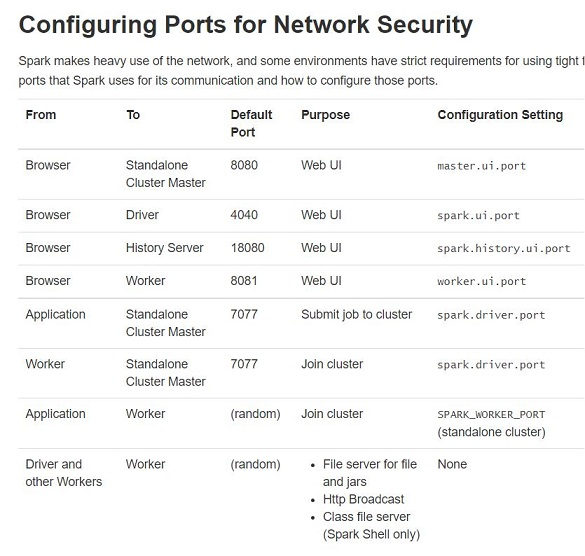